# Explore the dataset

In [2]:
import pandas as pd
import librosa
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
INPUT_PATH = "../dataset/"
SAMPLE_RATE = 22050

metadata = pd.read_csv(INPUT_PATH + "/metadata.csv")
annotation = pd.read_csv(INPUT_PATH + "/annotation.csv")
lables = pd.read_csv(INPUT_PATH + "/labels.csv")

audio_info= pd.merge(metadata, lables, on='filename')
print("Shape of Metadata : ",metadata.shape)
print("Shape of Annotation : ", annotation.shape)
print("Shape of Lables : ", lables.shape)
print("Shape of Audio info : ", audio_info.shape)

audio_info.head()

Shape of Metadata :  (661, 7)
Shape of Annotation :  (390, 5)
Shape of Lables :  (661, 3)
Shape of Audio info :  (661, 9)


,sample_rate,num_frames,num_channels,bits_per_sample,encoding,duration,filename,set,label
0,44100,396900,1,16,PCM_S,9.0,artifact__201012172012.wav,A,artifact
1,44100,396900,1,16,PCM_S,9.0,artifact__201105040918.wav,A,artifact
2,44100,396900,1,16,PCM_S,9.0,artifact__201105041959.wav,A,artifact
3,44100,396900,1,16,PCM_S,9.0,artifact__201105051017.wav,A,artifact
4,44100,396900,1,16,PCM_S,9.0,artifact__201105060108.wav,A,artifact


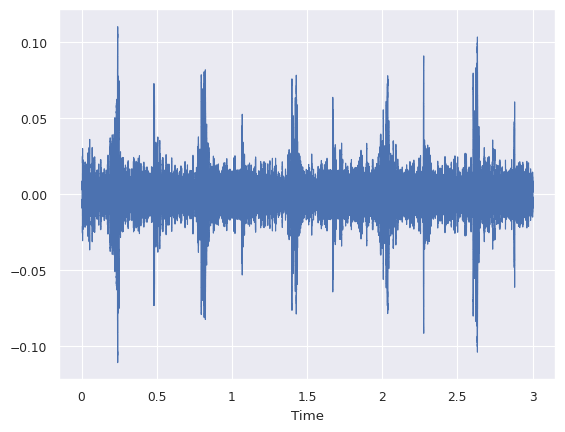

In [9]:
# loading and visualizing a sample wave

sampledata, sampling_rate = librosa.load(INPUT_PATH + "audio/normal__201102081321.wav", sr=SAMPLE_RATE,duration=3)
librosa.display.waveshow(sampledata, sr=sampling_rate)

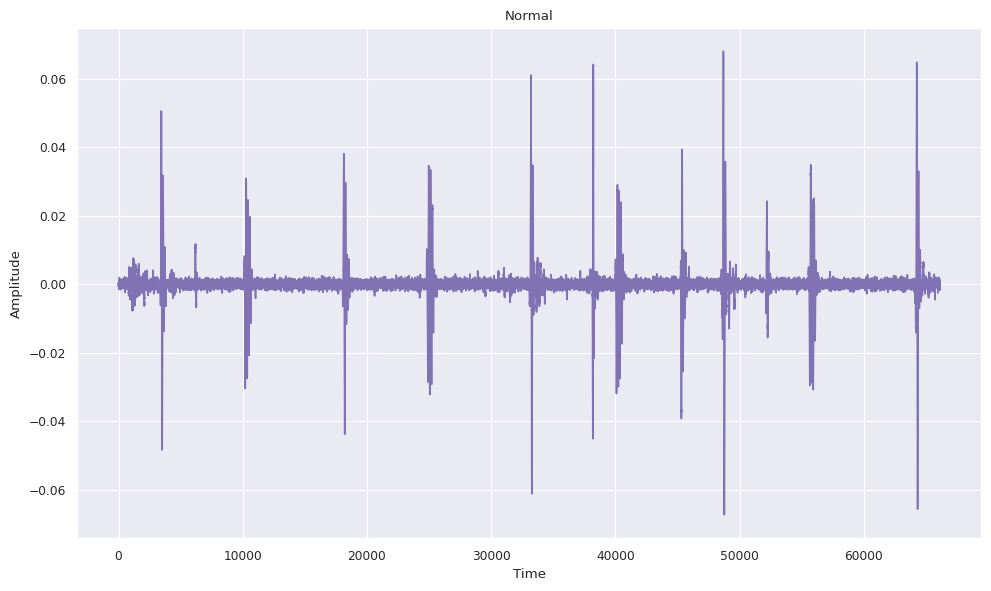

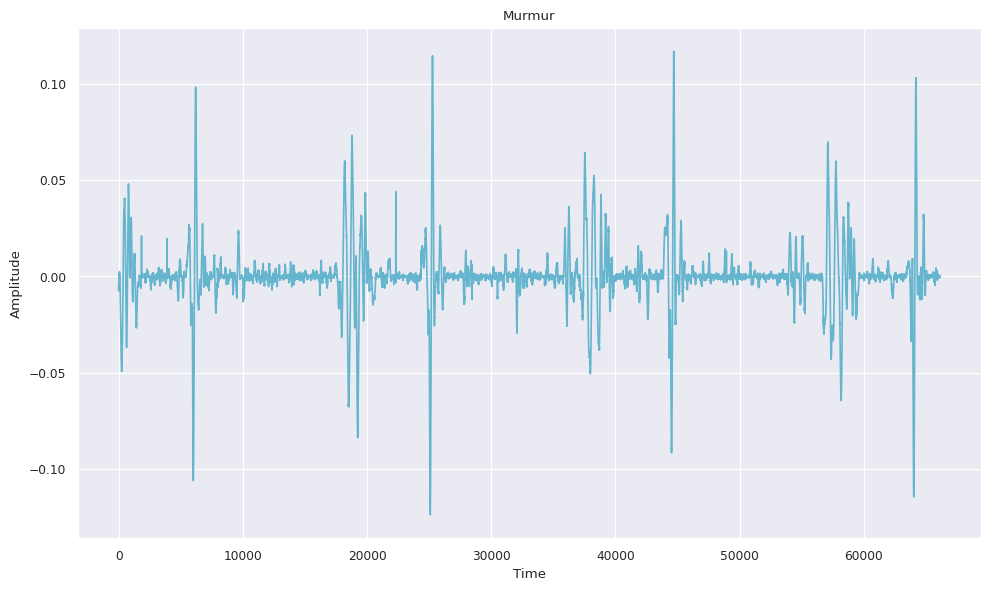

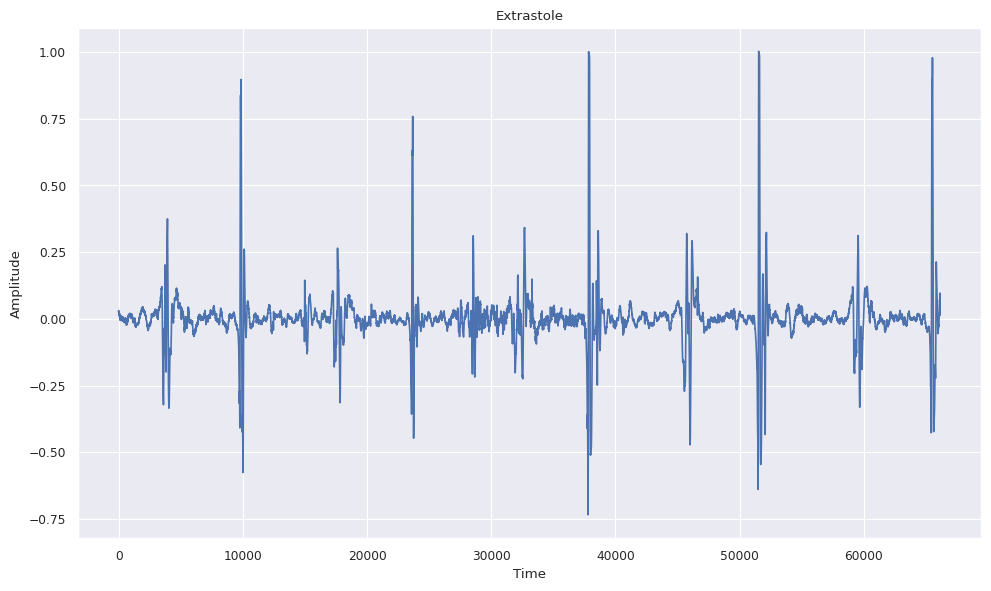

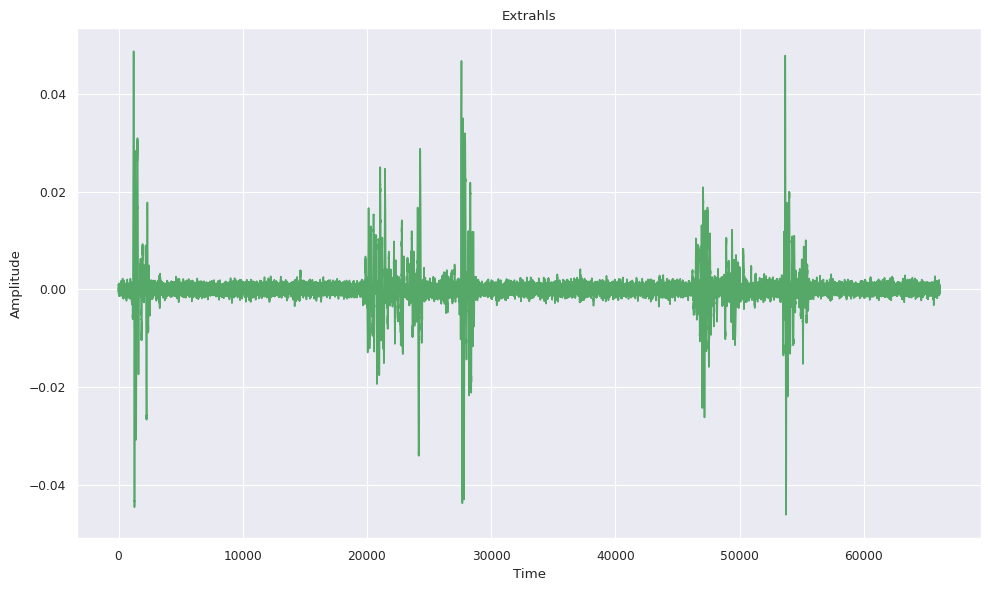

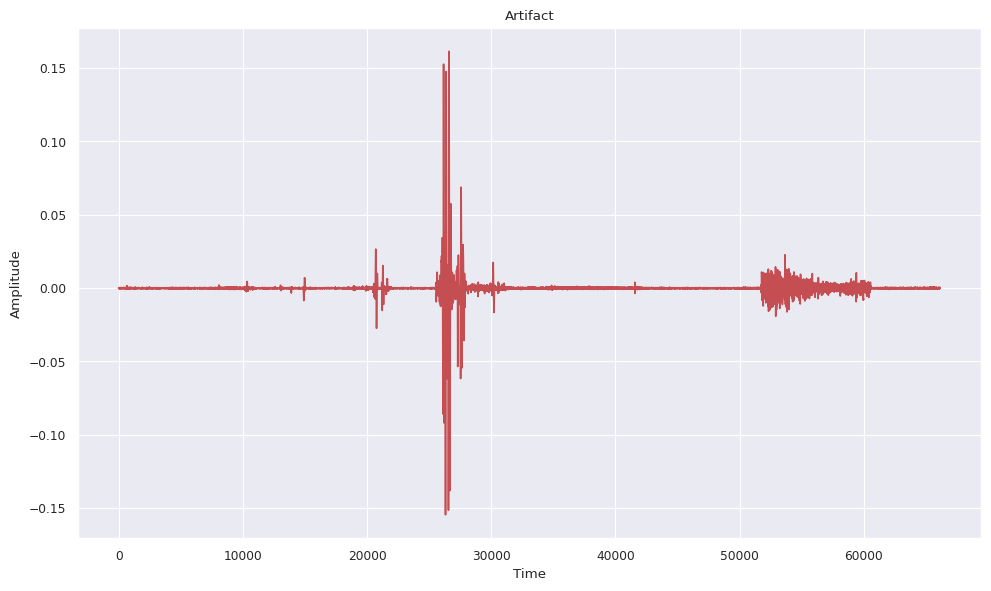

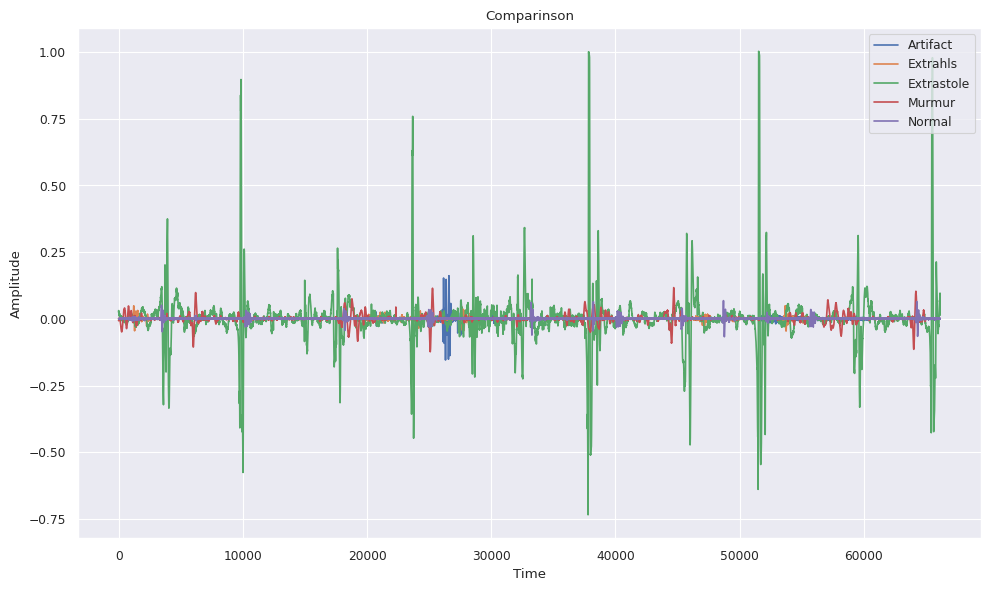

In [14]:
import librosa
import matplotlib.pyplot as plt

normal = audio_info.loc[audio_info["label"] == "normal"].head(1)
murmur = audio_info.loc[audio_info["label"] == "murmur"].head(1)
extrastole = audio_info.loc[audio_info["label"] == "extrastole"].head(1)
extrahls = audio_info.loc[audio_info["label"] == "extrahls"].head(1)
artifact = audio_info.loc[audio_info["label"] == "artifact"].head(1)

# Path to the audio files
path_normal = INPUT_PATH + "audio/" + normal["filename"].values[0]
path_murmur = INPUT_PATH + "audio/" + murmur["filename"].values[0]
path_extrastole = INPUT_PATH + "audio/" + extrastole["filename"].values[0]
path_extrahls = INPUT_PATH + "audio/" + extrahls["filename"].values[0]
path_artifact = INPUT_PATH + "audio/" + artifact["filename"].values[0]

# Load the audio files
y_normal, sr_normal = librosa.load(path_normal, sr=SAMPLE_RATE,duration=3)
y_murmur, sr_murmur = librosa.load(path_murmur, sr=SAMPLE_RATE,duration=3)
y_extrastole, sr_extrastole = librosa.load(path_extrastole, sr=SAMPLE_RATE,duration=3)
y_extrahls, sr_extrahls = librosa.load(path_extrahls, sr=SAMPLE_RATE,duration=3)
y_artifact, sr_artifact = librosa.load(path_artifact, sr=SAMPLE_RATE,duration=3)


# Plotting the waveforms
plt.figure(figsize=(10, 6))
plt.title("Normal")
plt.plot(y_normal,c="m")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Murmur")
plt.plot(y_murmur,c="c")
plt.xlabel("Time")  
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Extrastole")
plt.plot(y_extrastole,c="b")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Extrahls")
plt.plot(y_extrahls,c="g")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Artifact")
plt.plot(y_artifact,c="r")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Comparinson")
plt.plot(y_artifact, label="Artifact")
plt.plot(y_extrahls, label="Extrahls")
plt.plot(y_extrastole, label="Extrastole")
plt.plot(y_murmur, label="Murmur")
plt.plot(y_normal, label="Normal")
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

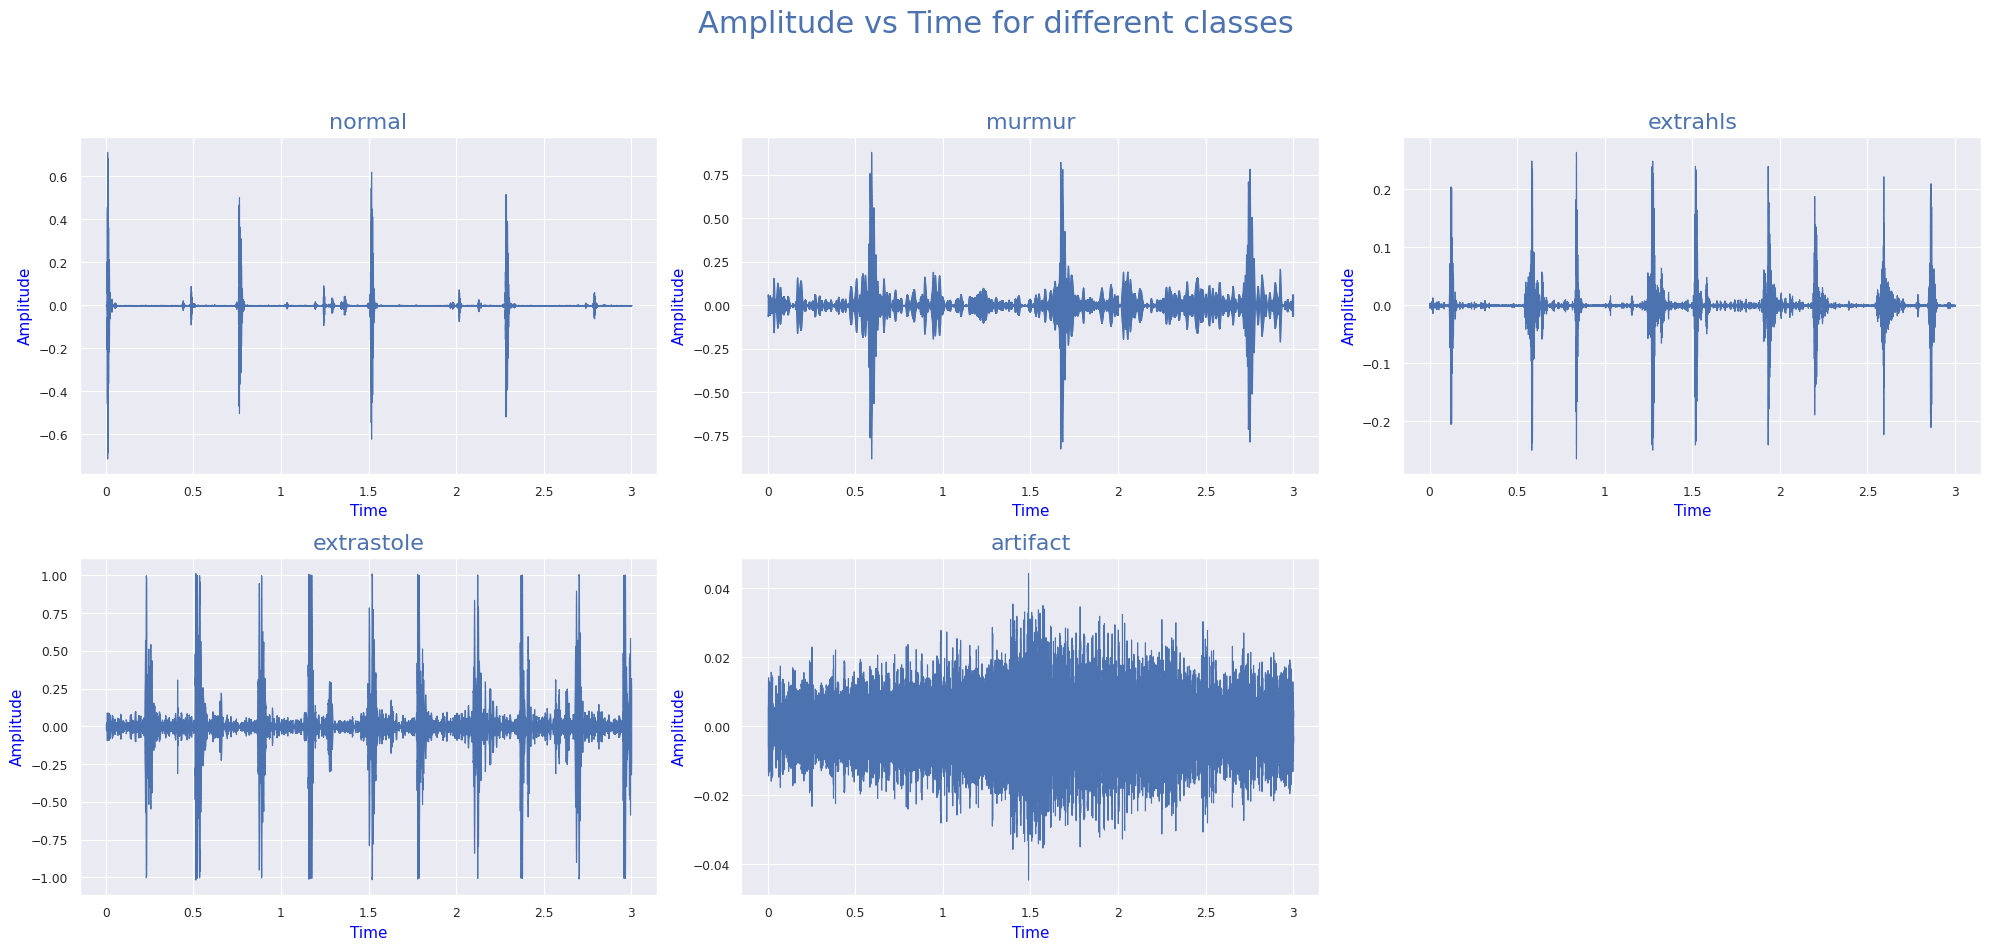

In [8]:
# oscillogram plots for all types of classes

samples = [
    "normal__201103170121.wav",
    "murmur__201101180902.wav",
    "extrahls__201101241423.wav",
    "extrastole__144_1306522408528_B.wav",
    "artifact__201106171003.wav",
]

sns.set_theme(context="paper", font_scale=1)

with plt.rc_context():
    plt.figure(figsize=(20, 9))
    plt.subplots_adjust(bottom=0.1e-5)
    plt.suptitle(
        "Amplitude vs Time for different classes", x=0.5, y=1.05, fontsize=22, color="b"
    )
    for i, f in enumerate(samples, 1):
        if i < 6:
            y, sr = librosa.load(INPUT_PATH + "audio/" + f, sr=SAMPLE_RATE, duration=3)
            plt.subplot(2, 3, i)
            librosa.display.waveshow(y, sr=SAMPLE_RATE)
            plt.title(f.split("_")[0], fontsize=16, color="b")
            plt.xlabel("Time", fontsize=11, color="blue")
            plt.ylabel("Amplitude", fontsize=11, color="blue")
    plt.tight_layout()

### Sample rate distribution

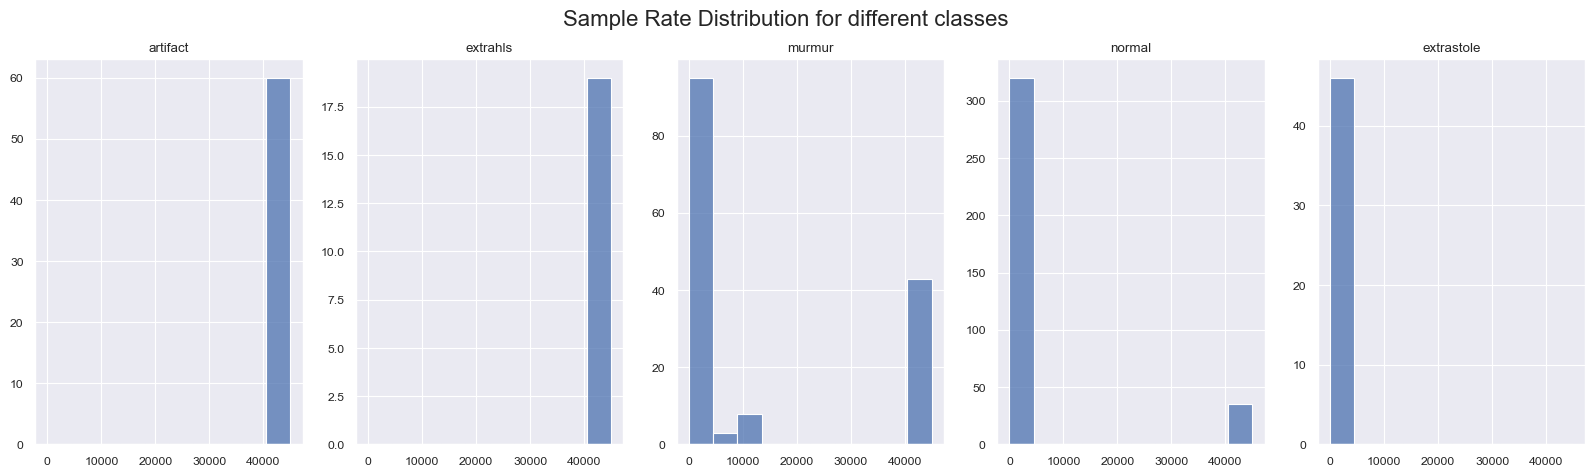

In [ ]:
unique_labels = audio_info['label'].unique()
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, label in enumerate(unique_labels):
     audio_info_tmp = audio_info[audio_info['label'] == label]
     sns.histplot(audio_info_tmp['sample_rate'], ax = axs[i], bins=10, binrange=(0, 45000))
     axs[i].set_title(label)
     axs[i].set_xlabel('')
     axs[i].set_ylabel('')
     fig.suptitle('Sample Rate Distribution for different classes', fontsize=16)